# **Hyper Parameters, Libraries, Data Loading**


## Hyper Parameters and Libraries

In [ ]:
# !pip install q keras==2.9.0

In [ ]:
# HYPER PARAMETERS

SPLIT = [6000, 3000, 3000] # train, val, test
IMG_WIDTH = 200
IMG_HEIGHT = 190
BATCH_SIZE = 10
LEARNING_RATE = 0.001
NUM_EPOCHS = 40

numLayers = [1, 2, 3, 4, 5]
layerSizes = [4, 8, 16, 32, 64, 128]
activation = 'relu'

In [ ]:
from os import listdir
from os.path import isfile, join
from google.colab import drive

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import tensorflow as tf
import PIL

from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import IPython

from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO

## Data Loading/Processing

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# collect files from drive

mainPath = '/content/drive/My Drive/271 Project/Augmented Alzheimer MRI Dataset/AugmentedAlzheimerDataset/'

nonDementedPath = mainPath + 'NonDemented/'
veryMildDementedPath = mainPath + 'VeryMildDemented/'
mildDementedPath = mainPath + 'MildDemented/'
moderateDementedPath = mainPath + 'ModerateDemented/'

nonDementedFiles = [join(nonDementedPath, f) for f in listdir(nonDementedPath) if isfile(join(nonDementedPath, f))]
veryMildDementedFiles = [join(veryMildDementedPath, f) for f in listdir(veryMildDementedPath) if isfile(join(veryMildDementedPath, f))]
mildDementedFiles = [join(mildDementedPath, f) for f in listdir(mildDementedPath) if isfile(join(mildDementedPath, f))]
moderateDementedFiles = [join(moderateDementedPath, f) for f in listdir(moderateDementedPath) if isfile(join(moderateDementedPath, f))]

In [ ]:
# organize data into x and labels

typeLens = [len(nonDementedFiles), len(veryMildDementedFiles), len(mildDementedFiles), len(moderateDementedFiles)]

images = nonDementedFiles + veryMildDementedFiles + mildDementedFiles + moderateDementedFiles
labels = np.ones((np.sum(typeLens)))

lenIndex = 0
for i in range(4):
  labels[lenIndex:(lenIndex+typeLens[i])] = i
  lenIndex += typeLens[i]

print(len(nonDementedFiles))
print(len(veryMildDementedFiles))
print(len(mildDementedFiles))
print(len(moderateDementedFiles))
print(len(images), len(labels))

9600
8960
8960
6464
33984 33984


0.0
e6af1a2b-d56d-40e9-b8e1-1cb6b1964c85.jpg
shape of image: (190, 200, 3)


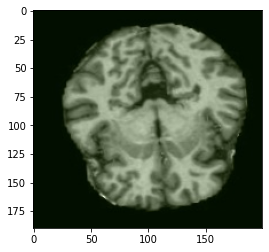

In [ ]:
# display sample image

EXAMPLE_PIC = images[0]
print(labels[0])

print(EXAMPLE_PIC.split('/')[-1])
img = load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)

print("shape of image: " + str(np.shape(cv2.imread(EXAMPLE_PIC))))

In [ ]:
# generates the data frame
def generate_df(files, labels, test):
  out = display(IPython.display.Pretty("Images Loaded: 0"), display_id=True)
  x = []
  y = []
  for i in range(len(files)):
    if(i % 10 == 9):
      out.update(IPython.display.Pretty(('Images Loaded: %d' %
                  (i+1))))
    im = cv2.imread(files[i])
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (IMG_WIDTH, IMG_HEIGHT)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    x.append(im)
    y.append(labels[i])

  out.update(IPython.display.Pretty(('Finished Loading %d Images' %
                  len(x))))

  if(test):
    x = np.array(x)
    y = np.array(y)
  else:
    x = np.array(x)
    x = x.reshape(x.shape[0], IMG_HEIGHT, IMG_WIDTH, 3)
    y = np_utils.to_categorical(y, 4)
  return x, y

In [ ]:
# split the files into train/val/test

split1 = SPLIT[0] / len(images)
split2 = SPLIT[1] / (len(images) - SPLIT[0])
split3 = SPLIT[2] / (len(images) - SPLIT[0] - SPLIT[1])

X_trainL, xSplit1, y_trainL, ySplit1 = train_test_split(images, labels, train_size=split1, random_state=0, shuffle=True, stratify=labels)
X_valL, xSplit2, y_valL, ySplit2 = train_test_split(xSplit1, ySplit1, train_size=split2, random_state=0, shuffle=True, stratify=ySplit1)
X_testL, xRemainder, y_testL, yRemainder = train_test_split(xSplit2, ySplit2, train_size=split3, random_state=0, shuffle=True, stratify=ySplit2)

print(np.shape(X_trainL), np.shape(X_valL) ,np.shape(X_testL)) # check size of each set after split
print(y_testL[0:20]) # check if ordering is randomized

(6000,) (3000,) (3000,)
[2. 1. 0. 3. 2. 0. 1. 0. 3. 3. 2. 3. 1. 1. 2. 0. 3. 1. 2. 0.]


In [ ]:
# this step takes forever. Takes ~1-2 hours
# can skip this step if data frames are saved

# x_train, y_train = generate_df(X_trainL, y_trainL, False)
# print(np.shape(x_train), np.shape(y_train))

# x_valid, y_valid = generate_df(X_valL, y_valL, False)
# print(np.shape(x_valid), np.shape(y_valid))

# x_test, y_test = generate_df(X_testL, y_testL, True)
# print(len(x_test), len(y_test))

# np.save('/content/drive/My Drive/271 Project/data frames/xTrainDF', x_train)
# np.save('/content/drive/My Drive/271 Project/data frames/yTrainDF', y_train)
# np.save('/content/drive/My Drive/271 Project/data frames/xValidDF', x_valid)
# np.save('/content/drive/My Drive/271 Project/data frames/yValidDF', y_valid)
# np.save('/content/drive/My Drive/271 Project/data frames/xTestDF', x_test)
# np.save('/content/drive/My Drive/271 Project/data frames/yTestDF', y_test)

In [ ]:
# if data frames are saved, do this instead

x_train = np.load('/content/drive/My Drive/271 Project/data frames/xTrainDF.npy')
y_train = np.load('/content/drive/My Drive/271 Project/data frames/yTrainDF.npy')
x_valid = np.load('/content/drive/My Drive/271 Project/data frames/xValidDF.npy')
y_valid = np.load('/content/drive/My Drive/271 Project/data frames/yValidDF.npy')
x_test = np.load('/content/drive/My Drive/271 Project/data frames/xTestDF.npy')
y_test = np.load('/content/drive/My Drive/271 Project/data frames/yTestDF.npy')

print(np.shape(x_train), np.shape(y_train))
print(np.shape(x_valid), np.shape(y_valid))
print(len(x_test), len(y_test))

(6000, 190, 200, 3) (6000, 4)
(3000, 190, 200, 3) (3000, 4)
3000 3000


In [ ]:
# image generator for training

train_datagen = ImageDataGenerator(validation_split=(SPLIT[1] / (SPLIT[0] + SPLIT[1])))
train_datagen.fit(x_train)

train_images = train_datagen.flow(
  x_train, y_train,
  batch_size=BATCH_SIZE,
  subset='training'
)

val_images = train_datagen.flow(
  x_valid, y_valid,
  batch_size=BATCH_SIZE,
  subset='validation'
)

# **Fully Connected Single Layer**

In [ ]:
linear = Sequential()
linear.add(Flatten())
linear.add(Dropout(0.2))
linear.add(Dense(4))

In [ ]:
linear.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), loss='categorical_crossentropy',metrics=['accuracy'])
history = linear.fit(train_images,validation_data=val_images , epochs=NUM_EPOCHS)

Epoch 1/40
400/400 [==============================] - 7s 16ms/step - loss: 9.2887 - accuracy: 0.2865 - val_loss: 10.2995 - val_accuracy: 0.2980
Epoch 2/40
400/400 [==============================] - 6s 15ms/step - loss: 9.1273 - accuracy: 0.2870 - val_loss: 7.4949 - val_accuracy: 0.2980
Epoch 3/40
400/400 [==============================] - 6s 15ms/step - loss: 8.1353 - accuracy: 0.2822 - val_loss: 7.4144 - val_accuracy: 0.2420
Epoch 4/40
400/400 [==============================] - 6s 15ms/step - loss: 7.2249 - accuracy: 0.2648 - val_loss: 7.4143 - val_accuracy: 0.2420
Epoch 5/40
400/400 [==============================] - 7s 17ms/step - loss: 7.2249 - accuracy: 0.2648 - val_loss: 7.4143 - val_accuracy: 0.2420
Epoch 6/40
400/400 [==============================] - 7s 18ms/step - loss: 7.2249 - accuracy: 0.2648 - val_loss: 7.4143 - val_accuracy: 0.2420
Epoch 7/40
400/400 [==============================] - 11s 28ms/step - loss: 7.2249 - accuracy: 0.2648 - val_loss: 7.4143 - val_accuracy: 0.24

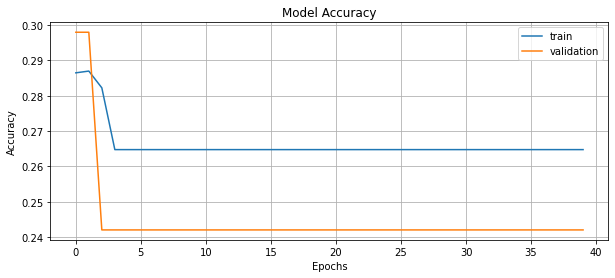

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# generate prediction
model_predictions = [ np.argmax(linear.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions)==y_test) / len(model_predictions)
print('Test accuracy: for linear model is %.4f%%' % test_accuracy)

Test accuracy: for linear model is 26.3667%


In [ ]:
print(model_predictions)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
# per class accuracy
correctPred = np.array([0, 0, 0, 0])
classTotals = np.array([0, 0, 0, 0])
for k in range(len(y_test)):
  if(y_test[k] == model_predictions[k]):
    correctPred[int(y_test[k])] += 1
  classTotals[int(y_test[k])] += 1
classAccs = correctPred / classTotals
print(correctPred)
print(classTotals)
print("per class acc: ", classAccs)

[  0   0 791   0]
[847 791 791 571]
per class acc:  [0. 0. 1. 0.]


# **CNNs**

## Build Model Function

In [ ]:
# builds a model with varying middle convolutional layers

def buildModel(layerSize, numLayers, act):
  m = models.Sequential()
  m.add(Conv2D(16, (3,3), activation = act, input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
  m.add(MaxPooling2D(2,2))

  for i in range(numLayers):
    m.add(Conv2D(layerSize, (3,3), activation = act, padding = 'valid'))
    m.add(MaxPooling2D(2,2))

  m.add(Flatten())
  m.add(layers.Dense(512, activation = act))
  m.add(Dropout(0.2))
  m.add(Dense(4, activation = 'softmax'))

  return m

## Train Sample Model

In [ ]:
# model shown in referenced notebook

model = buildModel(32, 3, 'relu')
print(model.summary())

# compile and run model
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), metrics = ['accuracy'])
history = model.fit(train_images,
    steps_per_epoch=len(train_images),
    validation_data = (x_valid, y_valid),
    validation_steps=len(x_valid),
    epochs=NUM_EPOCHS)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 188, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 94, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 23, 32)       0

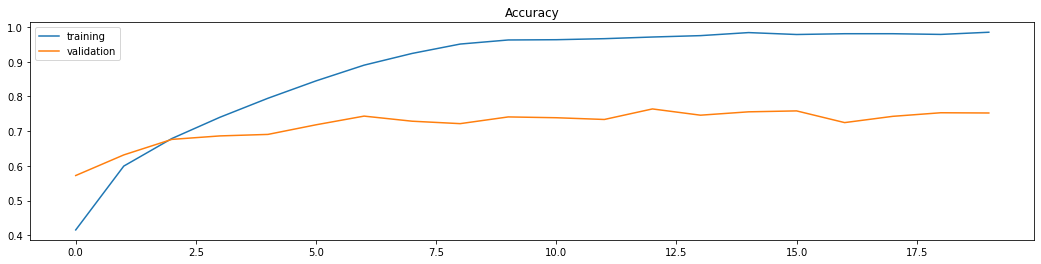

In [ ]:
# Plot accuracy through epochs
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'], label = 'training')
plt.plot(history.history['val_accuracy'], label = 'validation')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
# generate prediction
model_predictions = [ np.argmax(model.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions)==y_test) / len(model_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 75.7667%


## Train all Models

In [ ]:
# initialize test accuracy table

# accTable = np.zeros((5, 6))
# np.save('/content/drive/My Drive/271 Project/AccuracyTable', accTable)

# check on test accuracy table

table = np.load('/content/drive/My Drive/271 Project/AccuracyTable.npy')
print(table)

[[0.68466667 0.68433333 0.69366667 0.721      0.711      0.713     ]
 [0.69466667 0.703      0.728      0.72866667 0.73433333 0.72866667]
 [0.68933333 0.71166667 0.73033333 0.77633333 0.76833333 0.76866667]
 [0.60966667 0.661      0.74766667 0.76533333 0.78733333 0.28233333]
 [0.55466667 0.61766667 0.68733333 0.71633333 0.28233333 0.77566667]]


In [ ]:
accTable = np.load('/content/drive/My Drive/271 Project/AccuracyTable.npy')

for i in range(len(numLayers)):
  for k in range(len(layerSizes)):
    print("Layers: " + str(numLayers[i]) + ", Layer Size: " + str(layerSizes[k]) + ", Activation: " + activation)
    if(accTable[i][k] == 0):
      model = buildModel(layerSizes[k], numLayers[i], activation)
      model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), metrics = ['accuracy'])
      model.summary()

      hist = model.fit(train_images,
          steps_per_epoch=len(train_images),
          validation_data = (x_valid, y_valid),
          validation_steps=len(x_valid),
          epochs=NUM_EPOCHS)

      # save model history to csv
      hist_df = pd.DataFrame(hist.history)
      hist_csv_file = "/content/drive/My Drive/271 Project/model histories/" + str(numLayers[i]) + "_layers_" + str(layerSizes[k]) + "_filters_" + activation + "_activation_history.csv"
      with open(hist_csv_file, mode='w') as f:
          hist_df.to_csv(f)

      # get testing acc
      model_predictions = [ np.argmax(model.predict(feature, verbose=0)) for feature in x_test ]
      test_accuracy = np.sum(np.array(model_predictions)==y_test) / len(model_predictions)
      print("test accuracy: " + str(test_accuracy))
      accTable[i][k] = test_accuracy

      np.save('/content/drive/My Drive/271 Project/AccuracyTable', accTable)
      model.save("/content/drive/My Drive/271 Project/models/" + str(numLayers[i]) + "_layers_" + str(layerSizes[k]) + "_filters_" + activation + "_activation.hdf5")
    else:
      print("Model already evaluated, skipped")

## Retries for models that may have gotten stuck

In [ ]:
modelShapes = [[4, 128]]
accTable = np.load('/content/drive/My Drive/271 Project/AccuracyTable.npy')

for modelShape in modelShapes:
  print("Layers: " + str(modelShape[0]) + ", Layer Size: " + str(modelShape[1]) + ", Activation: relu")
  model = buildModel(modelShape[1], modelShape[0], 'relu')
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), metrics = ['accuracy'])

  hist = model.fit(train_images,
      steps_per_epoch=len(train_images),
      validation_data = (x_valid, y_valid),
      validation_steps=len(x_valid),
      epochs=40)

  # save model history to csv
  hist_df = pd.DataFrame(hist.history)
  hist_csv_file = "/content/drive/My Drive/271 Project/model histories/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_" + activation + "_activation_history.csv"
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  # get testing acc
  model_predictions = [ np.argmax(model.predict(feature, verbose=0)) for feature in x_test ]
  test_accuracy = np.sum(np.array(model_predictions)==y_test) / len(model_predictions)
  print("test accuracy: " + str(test_accuracy))
  accTable[numLayers.index(modelShape[0])][layerSizes.index(modelShape[1])] = test_accuracy

  np.save('/content/drive/My Drive/271 Project/AccuracyTable', accTable)
  model.save("/content/drive/My Drive/271 Project/models/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_" + activation + "_activation.hdf5")

Layers: 4, Layer Size: 128, Activation: relu
Epoch 1/40
400/400 [==============================] - 16s 38ms/step - loss: 1.3787 - accuracy: 0.2770 - val_loss: 1.3753 - val_accuracy: 0.2823
Epoch 2/40
400/400 [==============================] - 14s 35ms/step - loss: 1.3590 - accuracy: 0.3070 - val_loss: 1.3134 - val_accuracy: 0.3680
Epoch 3/40
400/400 [==============================] - 14s 36ms/step - loss: 1.1199 - accuracy: 0.4740 - val_loss: 0.9769 - val_accuracy: 0.5527
Epoch 4/40
400/400 [==============================] - 17s 43ms/step - loss: 0.8434 - accuracy: 0.6012 - val_loss: 0.7847 - val_accuracy: 0.6260
Epoch 5/40
400/400 [==============================] - 14s 35ms/step - loss: 0.7297 - accuracy: 0.6543 - val_loss: 0.7488 - val_accuracy: 0.6580
Epoch 6/40
400/400 [==============================] - 17s 44ms/step - loss: 0.6548 - accuracy: 0.6902 - val_loss: 0.7233 - val_accuracy: 0.6703
Epoch 7/40
400/400 [==============================] - 17s 44ms/step - loss: 0.5816 - accura

In [ ]:
# check on test accuracy table

table = np.load('/content/drive/My Drive/271 Project/AccuracyTable.npy')
print(table)

[[0.68466667 0.68433333 0.69366667 0.721      0.711      0.713     ]
 [0.69466667 0.703      0.728      0.72866667 0.73433333 0.72866667]
 [0.68933333 0.71166667 0.73033333 0.77633333 0.76833333 0.76866667]
 [0.60966667 0.661      0.74766667 0.76533333 0.78733333 0.79433333]
 [0.55466667 0.61766667 0.68733333 0.71633333 0.77266667 0.77566667]]


## Display Final Epoch

In [ ]:
def displayModels(label, epoch, lim = 1):
  base0 = "/content/drive/MyDrive/271 Project/model histories/"
  base1 = "_layers_"
  base2 = "_filters_relu_activation_history.csv"

  layers = [1, 2, 3, 4, 5]
  filtersInd = [1, 2, 3, 4, 5, 6]
  filters = [4, 8, 16, 32, 64, 128]

  primary_df = []
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  for i in layers: #here
    for j in filters:
      gen = base0+str(i)+base1+str(j)+base2
      df = pd.read_csv(gen)
      req_data = df.iloc[epoch]
      val = req_data[label]
      primary_df.append(val)
  x, y = layers, filtersInd

  colors = plt.cm.jet(primary_df/max(primary_df))

  xpos, ypos = np.meshgrid(x, y, indexing="ij")
  xpos = xpos.ravel()
  ypos = ypos.ravel()
  zpos = 0

  dx = 0.5
  dy = 0.7
  dz = primary_df

  ax.set_xlabel('layers')
  ax.set_ylabel('filters')
  ax.set_zlabel(label)

  ax.set_zlim(0, lim)
  plt.yticks(filtersInd, filters)
  ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color = colors)
  plt.title("Epoch: " + str(epoch+1))
  plt.show()

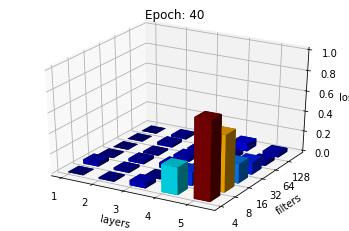

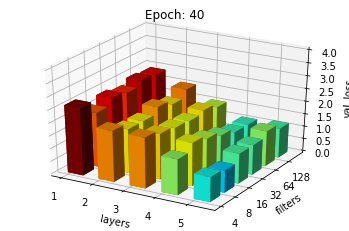

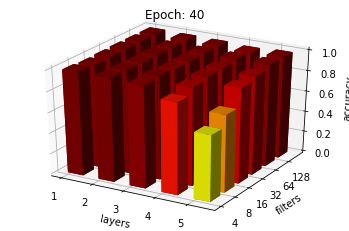

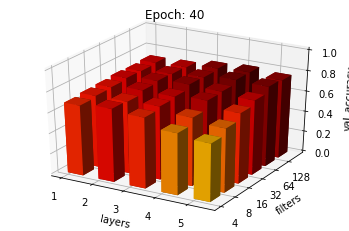

In [ ]:
displayModels('loss', 39)
displayModels('val_loss', 39, lim = 4)
displayModels('accuracy', 39)
displayModels('val_accuracy', 39)

## Tanh Activation on Best Models

In [ ]:
# initialize test accuracy table

# accTableTanh = np.zeros((4))
# np.save('/content/drive/My Drive/271 Project/AccuracyTableTanh', accTableTanh)

# check on test accuracy table

accTableTanh = np.load('/content/drive/My Drive/271 Project/AccuracyTableTanh.npy')

print(accTableTanh)

[0.70933333 0.74366667 0.72333333 0.709     ]


In [ ]:
modelShapes = [[4, 128], [4, 64], [5, 128], [3, 32]]
accTableTanh = np.load('/content/drive/My Drive/271 Project/AccuracyTableTanh.npy')

i = 0
for modelShape in modelShapes:
  print("Layers: " + str(modelShape[0]) + ", Layer Size: " + str(modelShape[1]) + ", Activation: tanh")
  model = buildModel(modelShape[1], modelShape[0], 'tanh')
  model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(learning_rate = LEARNING_RATE), metrics = ['accuracy'])

  hist = model.fit(train_images,
      steps_per_epoch=len(train_images),
      validation_data = (x_valid, y_valid),
      validation_steps=len(x_valid),
      epochs=40)

  # save model history to csv
  hist_df = pd.DataFrame(hist.history)
  hist_csv_file = "/content/drive/My Drive/271 Project/tanh model histories/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_tanh_activation_history.csv"
  with open(hist_csv_file, mode='w') as f:
      hist_df.to_csv(f)

  # get testing acc
  model_predictions = [ np.argmax(model.predict(feature, verbose=0)) for feature in x_test ]
  test_accuracy = np.sum(np.array(model_predictions)==y_test) / len(model_predictions)
  print("test accuracy: " + str(test_accuracy))
  accTableTanh[i] = test_accuracy
  i+=1

  np.save('/content/drive/My Drive/271 Project/AccuracyTableTanh', accTableTanh)
  model.save("/content/drive/My Drive/271 Project/tanh models/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_tanh_activation.hdf5")

Layers: 4, Layer Size: 128, Activation: tanh
Epoch 1/40
400/400 [==============================] - 16s 39ms/step - loss: 1.1457 - accuracy: 0.4742 - val_loss: 0.9469 - val_accuracy: 0.5537
Epoch 2/40
400/400 [==============================] - 14s 36ms/step - loss: 0.7965 - accuracy: 0.6528 - val_loss: 0.7335 - val_accuracy: 0.6723
Epoch 3/40
400/400 [==============================] - 14s 36ms/step - loss: 0.5525 - accuracy: 0.7620 - val_loss: 0.6888 - val_accuracy: 0.7157
Epoch 4/40
400/400 [==============================] - 18s 45ms/step - loss: 0.3733 - accuracy: 0.8468 - val_loss: 0.5878 - val_accuracy: 0.7670
Epoch 5/40
400/400 [==============================] - 14s 36ms/step - loss: 0.2133 - accuracy: 0.9143 - val_loss: 0.7200 - val_accuracy: 0.7707
Epoch 6/40
400/400 [==============================] - 18s 45ms/step - loss: 0.1797 - accuracy: 0.9365 - val_loss: 0.7111 - val_accuracy: 0.7803
Epoch 7/40
400/400 [==============================] - 18s 44ms/step - loss: 0.0780 - accura

## Accuracy and Loss on Best Models

Layers: 4, Layer Size: 128, Activation: relu
Layers: 4, Layer Size: 64, Activation: relu
Layers: 5, Layer Size: 128, Activation: relu
Layers: 3, Layer Size: 32, Activation: relu


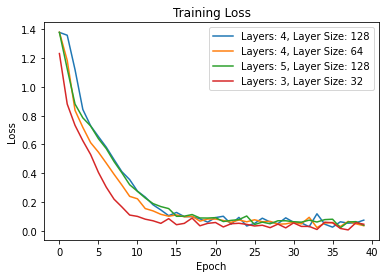

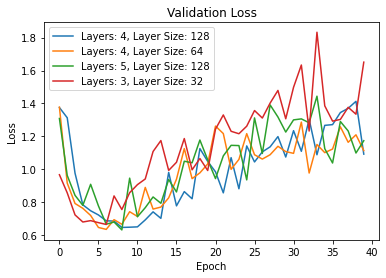

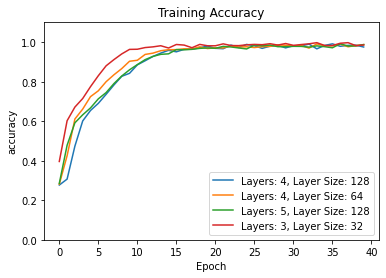

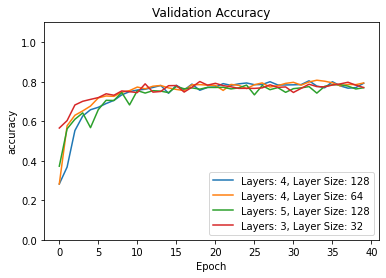

In [ ]:
bestModels = [[4, 128], [4, 64], [5, 128], [3, 32]]

loss = []
val_loss = []
accs = []
val_accs = []

i = 0
for modelShape in bestModels:
  print("Layers: " + str(modelShape[0]) + ", Layer Size: " + str(modelShape[1]) + ", Activation: relu")
  df = pd.read_csv("/content/drive/My Drive/271 Project/model histories/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_relu_activation_history.csv")

  loss.append(df['loss'])
  val_loss.append(df['val_loss'])
  accs.append(df['accuracy'])
  val_accs.append(df['val_accuracy'])

for i in range(4):
  plt.plot(np.arange(len(df['loss'])), loss[i], label = "Layers: " + str(bestModels[i][0]) + ", Layer Size: " + str(bestModels[i][1]))
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

for i in range(4):
  plt.plot(np.arange(len(df['val_loss'])), val_loss[i], label = "Layers: " + str(bestModels[i][0]) + ", Layer Size: " + str(bestModels[i][1]))
plt.title("Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

for i in range(4):
  plt.plot(np.arange(len(df['accuracy'])), accs[i], label = "Layers: " + str(bestModels[i][0]) + ", Layer Size: " + str(bestModels[i][1]))
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.ylim([0, 1.1])
plt.legend()
plt.show()

for i in range(4):
  plt.plot(np.arange(len(df['val_accuracy'])), val_accs[i], label = "Layers: " + str(bestModels[i][0]) + ", Layer Size: " + str(bestModels[i][1]))
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.ylim([0, 1.1])
plt.legend()
plt.show()

## Per Class Accuracy on Best Models

In [ ]:
# initialize test accuracy table

# accTableClass = np.zeros((4, 4))
# np.save('/content/drive/My Drive/271 Project/accTableClass', accTableClass)

# check on test accuracy table

accTableClass = np.load('/content/drive/My Drive/271 Project/accTableClass.npy')

print(accTableClass)

[[0.7579693  0.65992415 0.83312263 0.98073555]
 [0.7107438  0.69785082 0.82680152 0.97022767]
 [0.77095632 0.64348925 0.77370417 0.96847636]
 [0.80873672 0.57269279 0.80404551 0.97197898]]


In [ ]:
bestModels = [[4, 128], [4, 64], [5, 128], [3, 32]]
accTableClass = np.load('/content/drive/My Drive/271 Project/accTableClass.npy')

i = 0
for modelShape in bestModels:
  print("Layers: " + str(modelShape[0]) + ", Layer Size: " + str(modelShape[1]) + ", Activation: relu")
  model = buildModel(modelShape[1], modelShape[0], 'relu')
  model.load_weights("/content/drive/My Drive/271 Project/models/" + str(modelShape[0]) + "_layers_" + str(modelShape[1]) + "_filters_relu_activation.hdf5")

  model_predictions = [ np.argmax(model.predict(feature, verbose=0)) for feature in x_test ]
  correctPred = np.array([0, 0, 0, 0])
  classTotals = np.array([0, 0, 0, 0])
  for k in range(len(y_test)):
    if(y_test[k] == model_predictions[k]):
      correctPred[int(y_test[k])] += 1
    classTotals[int(y_test[k])] += 1
  print(correctPred)
  print(classTotals)
  classAccs = correctPred / classTotals
  print(classAccs)
  accTableClass[i] = classAccs
  i += 1

  np.save('/content/drive/My Drive/271 Project/accTableClass', accTableClass)

Layers: 4, Layer Size: 128, Activation: relu
[642 522 659 560]
[847 791 791 571]
[0.7579693  0.65992415 0.83312263 0.98073555]
Layers: 4, Layer Size: 64, Activation: relu
[602 552 654 554]
[847 791 791 571]
[0.7107438  0.69785082 0.82680152 0.97022767]
Layers: 5, Layer Size: 128, Activation: relu
[653 509 612 553]
[847 791 791 571]
[0.77095632 0.64348925 0.77370417 0.96847636]
Layers: 3, Layer Size: 32, Activation: relu
[685 453 636 555]
[847 791 791 571]
[0.80873672 0.57269279 0.80404551 0.97197898]


# **ResNet**

## ResNet 50 Transfer Learning - Using the same weights as that of ImageNet

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

resnet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_images,validation_data=val_images , epochs=NUM_EPOCHS)

Epoch 1/40
400/400 [==============================] - 19s 20ms/step - loss: 1.4456 - accuracy: 0.2890 - val_loss: 1.3590 - val_accuracy: 0.3490
Epoch 2/40
400/400 [==============================] - 7s 18ms/step - loss: 1.3450 - accuracy: 0.3237 - val_loss: 1.3360 - val_accuracy: 0.3580
Epoch 3/40
400/400 [==============================] - 7s 17ms/step - loss: 1.3130 - accuracy: 0.3490 - val_loss: 1.3214 - val_accuracy: 0.3240
Epoch 4/40
400/400 [==============================] - 7s 17ms/step - loss: 1.3069 - accuracy: 0.3613 - val_loss: 1.2788 - val_accuracy: 0.4020
Epoch 5/40
400/400 [==============================] - 7s 18ms/step - loss: 1.2951 - accuracy: 0.3690 - val_loss: 1.2721 - val_accuracy: 0.4000
Epoch 6/40
400/400 [==============================] - 7s 17ms/step - loss: 1.2812 - accuracy: 0.3767 - val_loss: 1.2562 - val_accuracy: 0.4030
Epoch 7/40
400/400 [==============================] - 7s 18ms/step - loss: 1.2562 - accuracy: 0.3812 - val_loss: 1.2343 - val_accuracy: 0.431

In [ ]:
# save models
resnet_model.save("/content/drive/My Drive/271 Project/resnet models/resnet50_transfer.hdf5")
hist_df = pd.DataFrame(history.history)
hist_csv_file = "/content/drive/My Drive/271 Project/resnet model histories/rsenet50_transfer_history.csv"
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

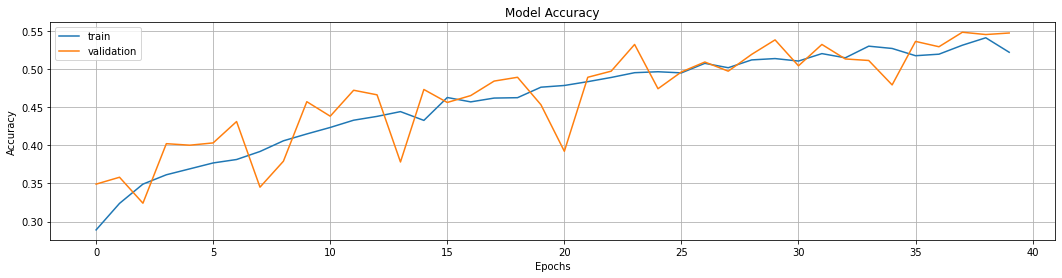

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# generate prediction
model_predictions_resnet_50 = [ np.argmax(resnet_model.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions_resnet_50)==y_test) / len(model_predictions_resnet_50)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 54.7333%


In [ ]:
# per class accuracy
correctPred = np.array([0, 0, 0, 0])
classTotals = np.array([0, 0, 0, 0])
for k in range(len(y_test)):
  if(y_test[k] == model_predictions_resnet_50[k]):
    correctPred[int(y_test[k])] += 1
  classTotals[int(y_test[k])] += 1
classAccs = correctPred / classTotals
print("per class acc: ", classAccs)

per class acc:  [0.67060213 0.06447535 0.65613148 0.882662  ]


## ResNet 50 - We will train all the parameters



In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                   pooling='avg',classes=4,
                   weights='imagenet')

# for layer in pretrained_model.layers:
#         layer.trainable=False

resnet_model.add(pretrained_model)

resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(4, activation='softmax'))

resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 24,585,732
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_images,validation_data=val_images , epochs=NUM_EPOCHS)

Epoch 1/40
400/400 [==============================] - 24s 42ms/step - loss: 1.1038 - accuracy: 0.5085 - val_loss: 1.7370 - val_accuracy: 0.2980
Epoch 2/40
400/400 [==============================] - 16s 40ms/step - loss: 0.8286 - accuracy: 0.6060 - val_loss: 2.3369 - val_accuracy: 0.3020
Epoch 3/40
400/400 [==============================] - 16s 40ms/step - loss: 0.7617 - accuracy: 0.6478 - val_loss: 4.9349 - val_accuracy: 0.3590
Epoch 4/40
400/400 [==============================] - 16s 40ms/step - loss: 0.6803 - accuracy: 0.6900 - val_loss: 0.9178 - val_accuracy: 0.5880
Epoch 5/40
400/400 [==============================] - 16s 40ms/step - loss: 0.6114 - accuracy: 0.7210 - val_loss: 0.9991 - val_accuracy: 0.6500
Epoch 6/40
400/400 [==============================] - 16s 40ms/step - loss: 0.5567 - accuracy: 0.7525 - val_loss: 0.6204 - val_accuracy: 0.7290
Epoch 7/40
400/400 [==============================] - 16s 40ms/step - loss: 0.4778 - accuracy: 0.7960 - val_loss: 1.5692 - val_accuracy:

In [ ]:
# save models
resnet_model.save("/content/drive/My Drive/271 Project/resnet models/resnet50_notransfer.hdf5")
hist_df = pd.DataFrame(history.history)
hist_csv_file = "/content/drive/My Drive/271 Project/resnet model histories/rsenet50_notransfer_history.csv"
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

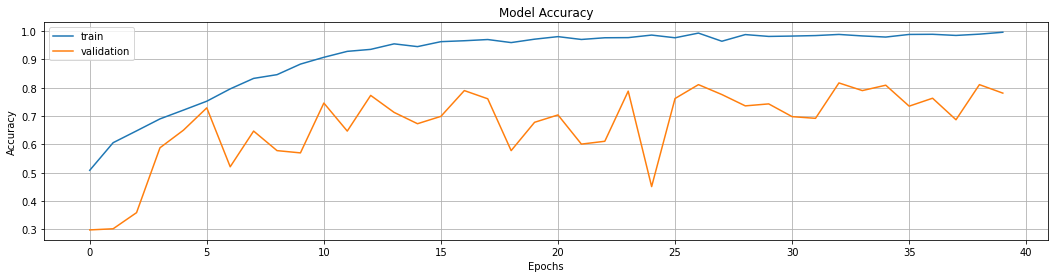

In [ ]:
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
# plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# generate prediction
model_predictions_resnet_50 = [ np.argmax(resnet_model.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions_resnet_50)==y_test) / len(model_predictions_resnet_50)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 77.0667%


In [ ]:
# per class accuracy
correctPred = np.array([0, 0, 0, 0])
classTotals = np.array([0, 0, 0, 0])
for k in range(len(y_test)):
  if(y_test[k] == model_predictions_resnet_50[k]):
    correctPred[int(y_test[k])] += 1
  classTotals[int(y_test[k])] += 1
classAccs = correctPred / classTotals
print("per class acc: ", classAccs)

per class acc:  [0.75560803 0.5676359  0.86978508 0.93695271]


## ResNet 101 Transfer Leraing

In [ ]:
resnet_model_101 = Sequential()

pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                   pooling='avg',classes=4,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model_101.add(pretrained_model)

resnet_model_101.add(Flatten())
resnet_model_101.add(Dense(512, activation='relu'))
resnet_model_101.add(Dense(4, activation='softmax'))

resnet_model_101.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,709,316
Trainable params: 1,051,140
Non-trainable params: 42,658,176
_________________________________________________________________


In [ ]:
resnet_model_101.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model_101.fit(train_images,validation_data=val_images , epochs=NUM_EPOCHS)

Epoch 1/40
400/400 [==============================] - 20s 35ms/step - loss: 1.3862 - accuracy: 0.3380 - val_loss: 1.2432 - val_accuracy: 0.3960
Epoch 2/40
400/400 [==============================] - 12s 30ms/step - loss: 1.2978 - accuracy: 0.3677 - val_loss: 1.2537 - val_accuracy: 0.4090
Epoch 3/40
400/400 [==============================] - 12s 30ms/step - loss: 1.2603 - accuracy: 0.3968 - val_loss: 1.2441 - val_accuracy: 0.4030
Epoch 4/40
400/400 [==============================] - 12s 30ms/step - loss: 1.2165 - accuracy: 0.4297 - val_loss: 1.1505 - val_accuracy: 0.4590
Epoch 5/40
400/400 [==============================] - 12s 30ms/step - loss: 1.2092 - accuracy: 0.4297 - val_loss: 1.2168 - val_accuracy: 0.4470
Epoch 6/40
400/400 [==============================] - 12s 30ms/step - loss: 1.1521 - accuracy: 0.4635 - val_loss: 1.1912 - val_accuracy: 0.4200
Epoch 7/40
400/400 [==============================] - 12s 30ms/step - loss: 1.1394 - accuracy: 0.4787 - val_loss: 1.0734 - val_accuracy:

In [ ]:
# save models
resnet_model_101.save("/content/drive/My Drive/271 Project/resnet models/resnet101_transfer.hdf5")
hist_df = pd.DataFrame(history.history)
hist_csv_file = "/content/drive/My Drive/271 Project/resnet model histories/rsenet101_transfer_history.csv"
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

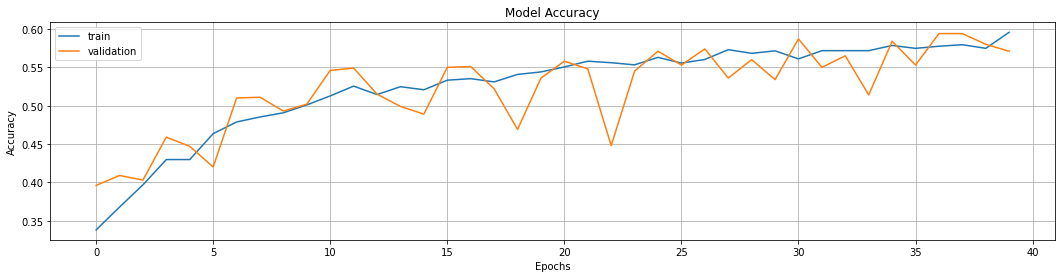

In [ ]:
# fig1 = plt.gcf()
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# generate prediction
model_predictions_resnet_101 = [ np.argmax(resnet_model_101.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions_resnet_101)==y_test) / len(model_predictions_resnet_101)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 55.4000%


In [ ]:
# per class accuracy
correctPred = np.array([0, 0, 0, 0])
classTotals = np.array([0, 0, 0, 0])
for k in range(len(y_test)):
  if(y_test[k] == model_predictions_resnet_101[k]):
    correctPred[int(y_test[k])] += 1
  classTotals[int(y_test[k])] += 1
classAccs = correctPred / classTotals
print("per class acc: ", classAccs)

per class acc:  [0.58559622 0.02528445 0.88369153 0.78283713]


## ResNet 101 (pretrained layers are still trainable)

In [ ]:
resnet_model_101 = Sequential()

pretrained_model= tf.keras.applications.ResNet101(include_top=False,
                   input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                   pooling='avg',classes=4,
                   weights='imagenet')

# for layer in pretrained_model.layers:
#         layer.trainable=False

resnet_model_101.add(pretrained_model)

resnet_model_101.add(Flatten())
resnet_model_101.add(Dense(512, activation='relu'))
resnet_model_101.add(Dense(4, activation='softmax'))

resnet_model_101.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 43,709,316
Trainable params: 43,603,972
Non-trainable params: 105,344
_________________________________________________________________


In [ ]:
resnet_model_101.compile(optimizer = optimizers.Adam(learning_rate = LEARNING_RATE),loss='categorical_crossentropy',metrics=['accuracy'])

history = resnet_model_101.fit(train_images,validation_data=val_images , epochs=NUM_EPOCHS)

Epoch 1/40
400/400 [==============================] - 43s 77ms/step - loss: 1.4135 - accuracy: 0.3140 - val_loss: 1.3898 - val_accuracy: 0.2980
Epoch 2/40
400/400 [==============================] - 29s 73ms/step - loss: 1.2833 - accuracy: 0.3835 - val_loss: 1.4007 - val_accuracy: 0.3140
Epoch 3/40
400/400 [==============================] - 29s 73ms/step - loss: 1.2414 - accuracy: 0.4013 - val_loss: 4.4277 - val_accuracy: 0.2570
Epoch 4/40
400/400 [==============================] - 29s 73ms/step - loss: 1.1297 - accuracy: 0.4688 - val_loss: 1.4020 - val_accuracy: 0.2640
Epoch 5/40
400/400 [==============================] - 29s 72ms/step - loss: 0.9759 - accuracy: 0.5412 - val_loss: 2.5814 - val_accuracy: 0.3340
Epoch 6/40
400/400 [==============================] - 29s 73ms/step - loss: 0.9067 - accuracy: 0.5688 - val_loss: 2.2622 - val_accuracy: 0.3790
Epoch 7/40
400/400 [==============================] - 29s 73ms/step - loss: 0.8403 - accuracy: 0.6012 - val_loss: 1.6184 - val_accuracy:

In [ ]:
# save models
resnet_model_101.save("/content/drive/My Drive/271 Project/resnet models/resnet101_notransfer.hdf5")
hist_df = pd.DataFrame(history.history)
hist_csv_file = "/content/drive/My Drive/271 Project/resnet model histories/rsenet101_notransfer_history.csv"
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

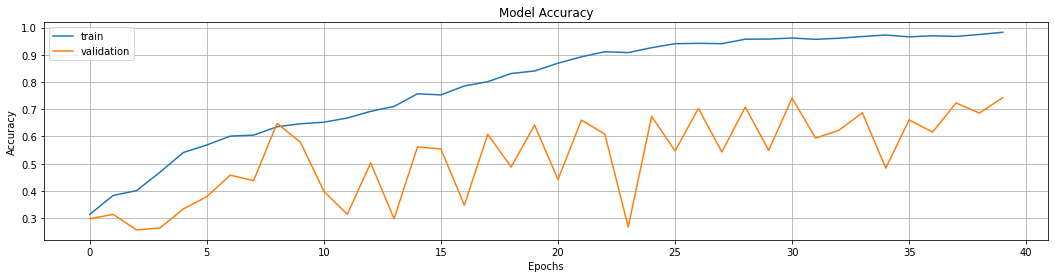

In [ ]:
# fig1 = plt.gcf()
plt.figure(figsize=(18, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
# generate prediction
model_predictions_resnet_101 = [ np.argmax(resnet_model_101.predict(feature, verbose=0)) for feature in x_test ]

# report test accuracy
test_accuracy = 100 * np.sum(np.array(model_predictions_resnet_101)==y_test) / len(model_predictions_resnet_101)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 73.9333%


In [ ]:
# per class accuracy
correctPred = np.array([0, 0, 0, 0])
classTotals = np.array([0, 0, 0, 0])
for k in range(len(y_test)):
  if(y_test[k] == model_predictions_resnet_101[k]):
    correctPred[int(y_test[k])] += 1
  classTotals[int(y_test[k])] += 1
classAccs = correctPred / classTotals
print("per class acc: ", classAccs)

per class acc:  [0.54309327 0.72566372 0.78381795 0.98774081]
